# Importing Packages

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm.notebook import tqdm

import warnings
warnings.simplefilter("ignore")

import tensorflow as tf
from keras import models, layers, regularizers, optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.applications.vgg16 import VGG16


# Baseline Model:  Densely Connected Network

In [11]:
train = pd.read_csv('../data/train.csv', index_col=0)
train.head()

,file,target
0,ISIC_1569119,1
1,ISIC_7536704,1
2,ISIC_3696488,1
3,ISIC_3343475,1
4,ISIC_7785723,1


In [12]:
val = pd.read_csv('../data/val.csv', index_col=0)
val.head()

,file,target
0,ISIC_6767569,1
1,ISIC_7312977,1
2,ISIC_1785627,1
3,ISIC_8066110,1
4,ISIC_8838753,1


In [13]:
test = pd.read_csv('../data/test_df.csv', index_col=0)
test.head()

,file,age,site,lesion_id,gender,target,jpg
0,ISIC_0000000,55.0,anterior torso,NaN,female,0,ISIC_0000000.jpg
1,ISIC_0000001,30.0,anterior torso,NaN,female,0,ISIC_0000001.jpg
2,ISIC_0000002,60.0,upper extremity,NaN,female,1,ISIC_0000002.jpg
3,ISIC_0000003,30.0,upper extremity,NaN,male,0,ISIC_0000003.jpg
4,ISIC_0000004,80.0,posterior torso,NaN,male,1,ISIC_0000004.jpg


In [14]:
train_fldr = "../split/train_imb"
val_fldr = "../split/val"

val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        val_fldr, 
        target_size = (256, 256),
        batch_size = 32)

train_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        train_fldr, 
        target_size = (256, 256),
        batch_size = 32)

Found 6626 images belonging to 2 classes.
Found 26500 images belonging to 2 classes.


In [15]:
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)

In [16]:
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 32
Number of validation samples: 32
train_images shape: (32, 256, 256, 3)
train_labels shape: (32, 2)
val_images shape: (32, 256, 256, 3)
val_labels shape: (32, 2)


In [17]:
train_img = train_images.reshape(train_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(val_img.shape)

(32, 196608)
(32, 196608)


In [18]:
train_y = np.reshape(train_labels[:,0], (32,1))
val_y = np.reshape(val_labels[:,0], (32,1))

# Densely Connected Network

In [19]:
model = models.Sequential()
model.add(layers.Dense(20, activation = 'relu', input_shape = (196608, ))) # 2 hidden layers
model.add(layers.Dense(7, activation = 'relu'))
model.add(layers.Dense(5, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [20]:
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 0.01),
              metrics = ['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.AUC(), tf.metrics.AUC(curve='PR')])

history = model.fit(train_img,
                    train_y,
                    epochs = 50,
                    batch_size = 32,
                    validation_data = (val_img, val_y))

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.7268 - accuracy: 0.3125 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00 - auc_1: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00 - val_auc_1: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00 - auc_1: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00 - val_auc_1: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00 - auc_1: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00 - val_auc_1: 0.0000e+00
Epoch 4/50
1/1 [===

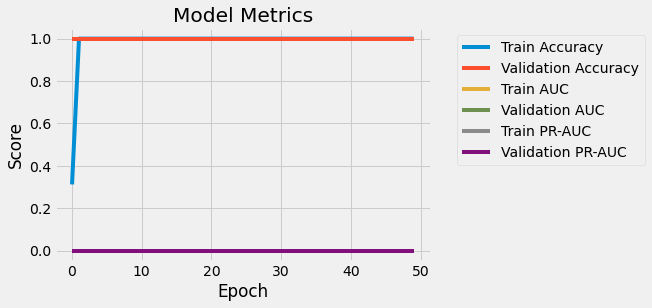

In [21]:
plt.style.use('fivethirtyeight')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.plot(history.history['auc_1'])
plt.plot(history.history['val_auc_1'])
plt.title('Model Metrics')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train AUC', 'Validation AUC', 'Train PR-AUC', 'Validation PR-AUC'], loc='best', bbox_to_anchor=(1.05, 1))
plt.show()

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                3932180   
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 3,932,373
Trainable params: 3,932,373
Non-trainable params: 0
_________________________________________________________________


In [23]:
results_train = model.evaluate(train_img, train_y)

1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00 - auc_1: 0.0000e+00


In [24]:
results_val = model.evaluate(val_img, val_y)

1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00 - auc_1: 0.0000e+00


In [25]:
results_train

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

In [26]:
results_val

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

# Basic CNN

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (256, 256, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
# padding = same for convolutions
# batchnormalize between convolution and activation
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 0.01),
              metrics = ['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.AUC(), tf.metrics.AUC(curve='PR')])

In [29]:
history2 = model.fit(train_images,
                    train_y,
                    epochs = 15,
                    batch_size = 32,
                    validation_data = (val_images, val_y))

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_auc_3: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_auc_3: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_a

In [30]:
results_train = model.evaluate(train_images, train_y)

1/1 [==============================] - 0s 307ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00


In [31]:
results_val = model.evaluate(val_images, val_y)

1/1 [==============================] - 0s 312ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00


In [32]:
results_train

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

In [33]:
results_val

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

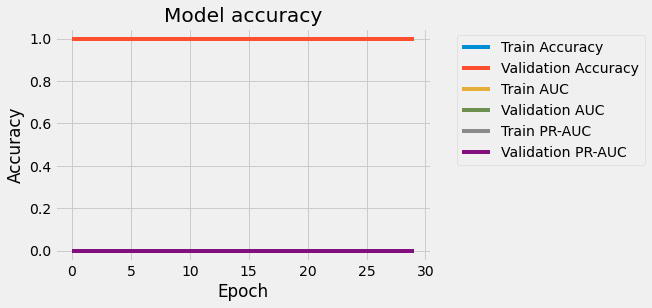

In [34]:
plt.style.use('fivethirtyeight')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['auc_2'])
plt.plot(history.history['val_auc_2'])
plt.plot(history.history['auc_3'])
plt.plot(history.history['val_auc_3'])
plt.plot
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train AUC', 'Validation AUC', 'Train PR-AUC', 'Validation PR-AUC'], loc='best', bbox_to_anchor=(1.05, 1))
plt.show()